In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv(r"https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-18/food_consumption.csv")

In [5]:
df.head()

,country,food_category,consumption,co2_emmission
0,Argentina,Pork,10.51,37.20
1,Argentina,Poultry,38.66,41.53
2,Argentina,Beef,55.48,1712.00
3,Argentina,Lamb & Goat,1.56,54.63
4,Argentina,Fish,4.36,6.96


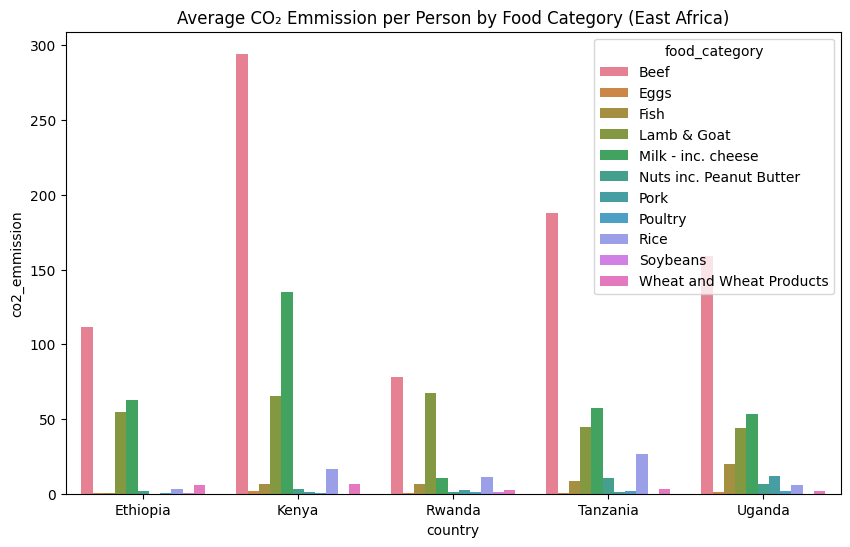

In [9]:
#The average C02 emission per person by food category among five countries
east_africa = ["Kenya", "Uganda", "Tanzania", "Rwanda", "Ethiopia"]
df_ea = df[df["country"].isin(east_africa)]

avg_emissions = df_ea.groupby(["country", "food_category"])["co2_emmission"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=avg_emissions, x="country", y="co2_emmission", hue="food_category")
plt.title("Average CO₂ Emmission per Person by Food Category (East Africa)")
plt.show()

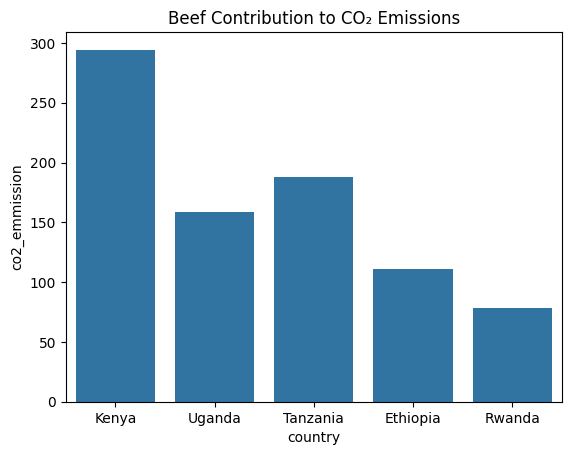

In [11]:
#Highlight the marked difference between consumption and emissions in certain food product of your choice
beef_data = df_ea[df_ea["food_category"]=="Beef"]
sns.barplot(data=beef_data, x="country", y="co2_emmission")
plt.title("Beef Contribution to CO₂ Emissions")
plt.show()

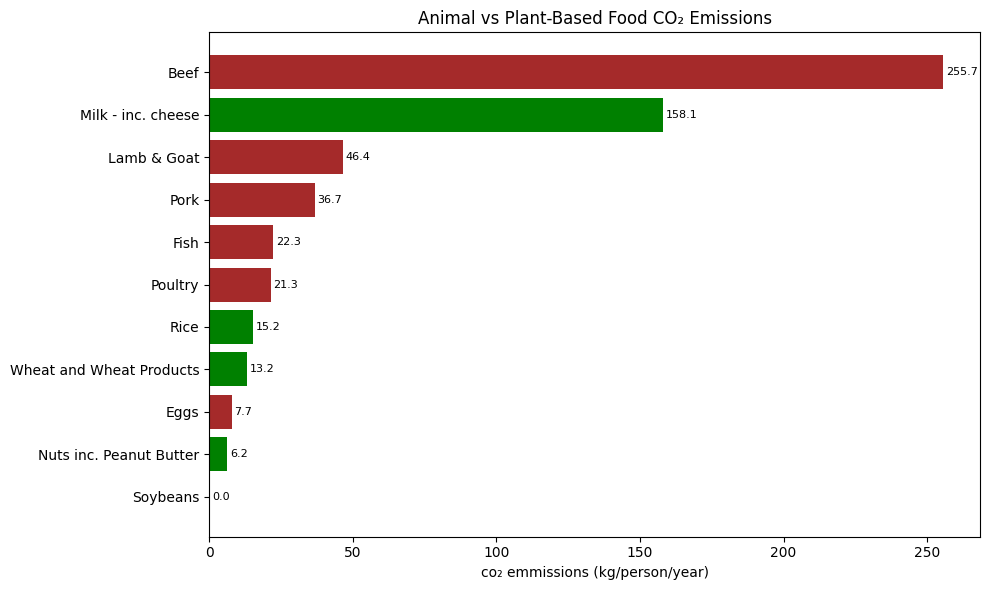

In [16]:
#The food consumption of animal and non-animal products and the impact on carbon footprint. 
animal_foods = ["Beef", "Pork", "Poultry", "Fish", "Milk (incl. cheese)", "Lamb & Goat", "Eggs"]
df["Type"] = df["food_category"].apply(lambda x: "Animal" if x in animal_foods else "Plant")

# Compute median (or mean) CO₂ emissions per category
food_emissions = df.groupby(["food_category", "Type"])["co2_emmission"].median().reset_index()

# Sort categories by CO₂ emission
food_emissions = food_emissions.sort_values("co2_emmission", ascending=False)

colors = food_emissions["Type"].map({"Animal": "brown", "Plant": "green"})


plt.figure(figsize=(10,6))
bars = plt.barh(food_emissions["food_category"], food_emissions["co2_emmission"], color=colors)

plt.xlabel("co₂ emmissions (kg/person/year)")
plt.title("Animal vs Plant-Based Food CO₂ Emissions")

for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f"{width:.1f}", va="center", fontsize=8)

plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

In [25]:
#Beef's contribution to CO2 emissions (kg/person/year)
import pycountry
import plotly.express as px

# Function to convert country name to ISO-3
def get_iso3(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except LookupError:
        return None

# Add iso3 column
beef_global["iso_alpha"] = beef_global["country"].apply(get_iso3)

# Drop rows that couldn't be converted
beef_global = beef_global.dropna(subset=["iso_alpha"])

# Plot choropleth using ISO-3 codes
fig = px.choropleth(
    beef_global,
    locations="iso_alpha",        
    color="co2_emmission",        
    title="Beef CO₂ Emissions (kg/person/year)",
    color_continuous_scale="Reds"
)

fig.show()

ModuleNotFoundError: No module named 'pycountry'

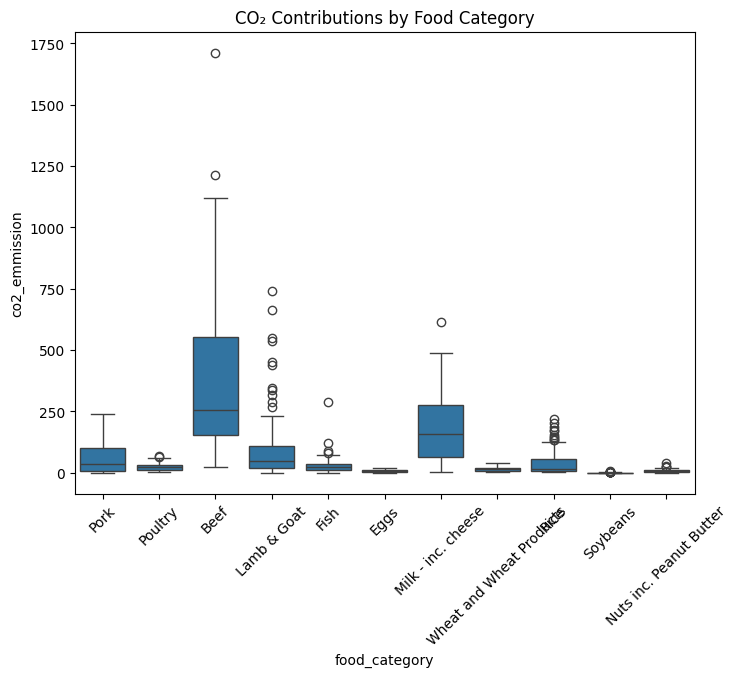

In [21]:
#A box plot and interpretation of the CO2 contributions of food levels.
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="food_category", y="co2_emmission")
plt.xticks(rotation=45)
plt.title("CO₂ Contributions by Food Category")
plt.show()

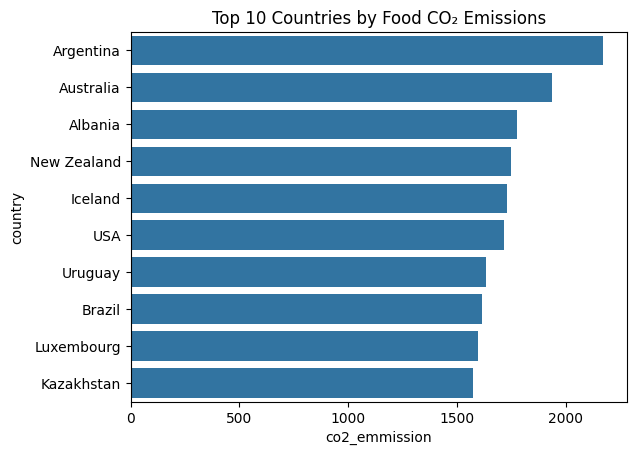

In [24]:
#Top 10 Countries with highest emissions. 
top10 = df.groupby("country")["co2_emmission"].sum().nlargest(10).reset_index()
sns.barplot(data=top10, x="co2_emmission", y="country")
plt.title("Top 10 Countries by Food CO₂ Emissions")
plt.show()